In [1]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from qiskit import Aer
from matplotlib import style
style.use("classic")
%matplotlib inline

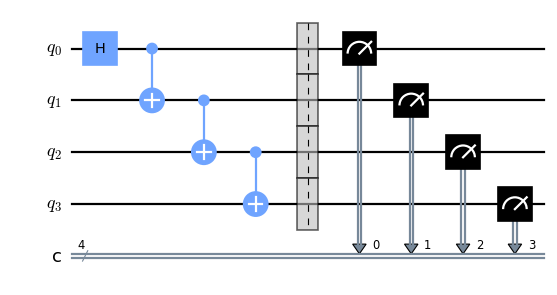

In [2]:
circuit = QuantumCircuit(4, 4)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.cx(2, 3)
circuit.barrier()
circuit.measure(range(4), range(4))
circuit.draw('mpl')

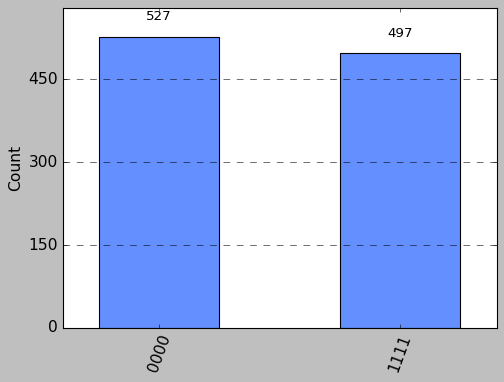

In [3]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend("aer_simulator")

job = q.execute(circuit , backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

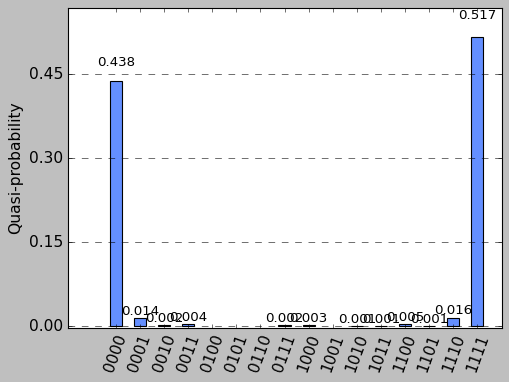

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
from qiskit.visualization import plot_histogram
from time import sleep

QiskitRuntimeService.save_account(channel="ibm_quantum", token="", overwrite=True)
service = QiskitRuntimeService()

options = Options(optimization_level=1)
options.execution.shots = 5120*2

with Session(service=service, backend="ibmq_lima") as session:
    sampler = Sampler(session=session, options=options)
    job = sampler.run(circuits=circuit)
    result = job.result()
binary_prob = result.quasi_dists[0].binary_probabilities()

plot_histogram([binary_prob])